In [348]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

In [349]:
df = pd.read_csv('apps.csv')

In [350]:
df.head()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
0,Ak Parti Yardım Toplama,SOCIAL,NaN,0,8.7,0,Paid,$13.99,Teen,Social,"July 28, 2017",4.1 and up
1,Ain Arabic Kids Alif Ba ta,FAMILY,NaN,0,33.0,0,Paid,$2.99,Everyone,Education,"April 15, 2016",3.0 and up
2,Popsicle Launcher for Android P 9.0 launcher,PERSONALIZATION,NaN,0,5.5,0,Paid,$1.49,Everyone,Personalization,"July 11, 2018",4.2 and up
3,Command & Conquer: Rivals,FAMILY,NaN,0,19.0,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device
4,CX Network,BUSINESS,NaN,0,10.0,0,Free,0,Everyone,Business,"August 6, 2018",4.1 and up


In [351]:
df.shape

(10841, 12)

In [352]:
df.isna().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size_MBs             0
Installs             0
Type                 1
Price                0
Content_Rating       0
Genres               0
Last_Updated         0
Android_Ver          2
dtype: int64

In [353]:
#Look at a random sample of 5 different rows with .sample()
df.sample(5)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres,Last_Updated,Android_Ver
6701,Cinemark Theatres,ENTERTAINMENT,4.1,21867,39.00,"1,000,000",Free,0,Teen,Entertainment,"July 12, 2018",5.0 and up
5051,Yongqing fast search,HOUSE_AND_HOME,3.7,1437,8.85,"100,000",Free,0,Everyone,House & Home,"August 2, 2018",Varies with device
9557,Word Search,GAME,4.7,295241,3.90,"10,000,000",Free,0,Everyone,Word,"June 6, 2018",3.0 and up
7270,Virtual Assistant DataBot: Artificial Intellig...,FAMILY,4.4,80927,27.00,"1,000,000",Free,0,Everyone,Entertainment,"July 31, 2018",4.0 and up
9050,Google Allo,COMMUNICATION,4.3,346982,3.50,"10,000,000",Free,0,Everyone,Communication,"January 23, 2018",4.1 and up


In [354]:
df_new = df.drop(['Last_Updated', 'Android_Ver'], axis=1)

In [355]:
df_cleaned = df_new.dropna()
df_cleaned.shape

(9367, 10)

In [356]:
# Are there any duplicates in data? Check for duplicates using the .duplicated() function. 

In [357]:
df_cleaned.duplicated().sum() #tamamen aynı olan rowları tespit eder 

476

In [358]:
# How many entries can you find for the "Instagram" app? 

In [359]:
df_cleaned[df_cleaned.App == 'Instagram'].duplicated()

10806    False
10808    False
10809     True
10810    False
dtype: bool

In [360]:
# Use .drop_duplicates() to remove any duplicates from cleaned_df.

In [361]:
df_cleaned = df_cleaned.drop_duplicates()

In [362]:
df_cleaned[df_cleaned.App == 'Instagram']

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10806,Instagram,SOCIAL,4.5,66577313,5.3,"1,000,000,000",Free,0,Teen,Social
10808,Instagram,SOCIAL,4.5,66577446,5.3,"1,000,000,000",Free,0,Teen,Social
10810,Instagram,SOCIAL,4.5,66509917,5.3,"1,000,000,000",Free,0,Teen,Social


In [363]:
#subsette belirtilen columnların içindeki değerlerin aynı olan rowlarının copylerini droplar.
df_cleaned = df_cleaned.drop_duplicates(subset=['App', 'Type', 'Price'])
df_cleaned.shape

(8199, 10)

In [364]:
# Identify which apps are the highest rated. 
# What problem might you encounter if you rely exclusively on ratings alone to determine the quality of an app?

In [365]:
df_cleaned.Rating.max() 

5.0

In [366]:
df_cleaned[df_cleaned.Rating == 5.0] #ilk 5 örenege baktığımızda reviewler baya düşük değerler yani oy veren sayısı çok az 
                                     #bu yüzden sadece ratinge bakarak appin kalitesi ölçülmez.

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
21,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0,Everyone,Medical
28,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,$1.49,Everyone,Arcade
47,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,$0.99,Everyone,Arcade
82,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0,Everyone,Arcade
99,Anatomy & Physiology Vocabulary Exam Review App,MEDICAL,5.0,1,4.6,5,Free,0,Everyone,Medical
...,...,...,...,...,...,...,...,...,...,...
2680,Florida Wildflowers,FAMILY,5.0,5,69.0,"1,000",Free,0,Everyone,Education
2750,"Superheroes, Marvel, DC, Comics, TV, Movies News",COMICS,5.0,34,12.0,"5,000",Free,0,Everyone,Comics
3030,CL Keyboard - Myanmar Keyboard (No Ads),TOOLS,5.0,24,3.2,"5,000",Free,0,Everyone,Tools
3115,Oración CX,LIFESTYLE,5.0,103,3.8,"5,000",Free,0,Everyone,Lifestyle


In [367]:
# What's the size in megabytes (MB) of the largest Android apps in the Google Play Store. 
# Based on the data, do you think there could be a limit in place or can developers make apps as large as they please?

In [368]:
df_cleaned['Size_MBs'].max()

100.0

In [369]:
df_cleaned[df_cleaned['Size_MBs'] == 100]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
1795,Navi Radiography Pro,MEDICAL,4.7,11,100.0,500,Paid,$15.99,Everyone,Medical
3144,Vi Trainer,HEALTH_AND_FITNESS,3.6,124,100.0,"5,000",Free,0,Everyone,Health & Fitness
4176,Car Crash III Beam DH Real Damage Simulator 2018,GAME,3.6,151,100.0,"10,000",Free,0,Everyone,Racing
7926,Post Bank,FINANCE,4.5,60449,100.0,"1,000,000",Free,0,Everyone,Finance
7927,The Walking Dead: Our World,GAME,4.0,22435,100.0,"1,000,000",Free,0,Teen,Action
7928,Stickman Legends: Shadow Wars,GAME,4.4,38419,100.0,"1,000,000",Paid,$0.99,Everyone 10+,Action
8718,Mini Golf King - Multiplayer Game,GAME,4.5,531458,100.0,"5,000,000",Free,0,Everyone,Sports
8719,Draft Simulator for FUT 18,SPORTS,4.6,162933,100.0,"5,000,000",Free,0,Everyone,Sports
9942,Talking Babsy Baby: Baby Games,LIFESTYLE,4.0,140995,100.0,"10,000,000",Free,0,Everyone,Lifestyle;Pretend Play
9943,Miami crime simulator,GAME,4.0,254518,100.0,"10,000,000",Free,0,Mature 17+,Action


In [370]:
# Which apps have the highest number of reviews?

In [371]:
df_cleaned[df_cleaned.Reviews == df_cleaned.Reviews.max()]

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.3,"1,000,000,000",Free,0,Teen,Social


In [372]:
# Are there any paid apps among the top 50?

In [373]:
df_sorted_by_reviews = df_cleaned.sort_values(['Reviews'], ascending=False).head(50)
df_sorted_by_reviews

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10805,Facebook,SOCIAL,4.1,78158306,5.30,"1,000,000,000",Free,0,Teen,Social
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,"1,000,000,000",Free,0,Everyone,Communication
10806,Instagram,SOCIAL,4.5,66577313,5.30,"1,000,000,000",Free,0,Teen,Social
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,"1,000,000,000",Free,0,Everyone,Communication
10650,Clash of Clans,GAME,4.6,44891723,98.00,"100,000,000",Free,0,Everyone 10+,Strategy
10744,Clean Master- Space Cleaner & Antivirus,TOOLS,4.7,42916526,3.40,"500,000,000",Free,0,Everyone,Tools
10835,Subway Surfers,GAME,4.5,27722264,76.00,"1,000,000,000",Free,0,Everyone 10+,Arcade
10828,YouTube,VIDEO_PLAYERS,4.3,25655305,4.65,"1,000,000,000",Free,0,Teen,Video Players & Editors
10746,"Security Master - Antivirus, VPN, AppLock, Boo...",TOOLS,4.7,24900999,3.40,"500,000,000",Free,0,Everyone,Tools
10584,Clash Royale,GAME,4.6,23133508,97.00,"100,000,000",Free,0,Everyone 10+,Strategy


In [374]:
df_sorted_by_reviews[df_sorted_by_reviews.Price != '0']  # Top 50 de ücretli olan uygulama yok

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres


In [375]:
ratings = df_cleaned['Content_Rating'].value_counts()

In [376]:
import plotly.express as px
import numpy as np

In [377]:
fig = px.pie(labels=np.array(ratings.index), values=ratings.values, title="Content Rating", names=ratings.index)

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [378]:
# To create a donut 🍩 chart, we can simply add a value for the hole argument:

In [379]:
fig = px.pie(labels=np.array(ratings.index), values=ratings.values, title="Content Rating", names=ratings.index, hole=0.5)

fig.update_traces(textposition='outside', textinfo='percent+label')

fig.show()

In [380]:
# How many apps had over 1 billion (that's right - BILLION) installations? How many apps just had a single install?

In [381]:
df_cleaned.Installs.describe() # or df_cleaned.info


count          8199
unique           19
top       1,000,000
freq           1417
Name: Installs, dtype: object

In [382]:
def check(param):
    param_arr = param.split(',')
    value = ''
    for i in param_arr:
        value += i
    
    return int(value)

df_cleaned.Installs = df_cleaned.Installs.apply(check)
df_cleaned[df_cleaned.Installs == 1000000000]

#Alternative
#df_apps_clean.Installs = df_apps_clean.Installs.astype(str).str.replace(',', "", regex=True)
#df_apps_clean.Installs = pd.to_numeric(df_apps_clean.Installs)
#df_apps_clean[['App', 'Installs']].groupby('Installs').count()

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
10783,Google Play Books,BOOKS_AND_REFERENCE,3.9,1433233,5.70,1000000000,Free,0,Teen,Books & Reference
10784,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56642847,3.50,1000000000,Free,0,Everyone,Communication
10785,WhatsApp Messenger,COMMUNICATION,4.4,69119316,3.50,1000000000,Free,0,Everyone,Communication
10786,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642995,3.50,1000000000,Free,0,Everyone,Communication
10787,Gmail,COMMUNICATION,4.3,4604324,3.50,1000000000,Free,0,Everyone,Communication
10788,Hangouts,COMMUNICATION,4.0,3419249,3.50,1000000000,Free,0,Everyone,Communication
10792,Skype - free IM & video calls,COMMUNICATION,4.1,10484169,3.50,1000000000,Free,0,Everyone,Communication
10803,Google Play Games,ENTERTAINMENT,4.3,7165362,9.35,1000000000,Free,0,Teen,Entertainment
10805,Facebook,SOCIAL,4.1,78158306,5.30,1000000000,Free,0,Teen,Social
10806,Instagram,SOCIAL,4.5,66577313,5.30,1000000000,Free,0,Teen,Social


In [383]:
# Convert the price column to numeric data. Then investigate the top 20 most expensive apps in the dataset.

In [384]:
df_cleaned.Price = df_cleaned.Price.astype(str).str.replace('$', "", regex=True)
df_cleaned.Price = pd.to_numeric(df_cleaned.Price)

In [385]:
df_cleaned.sort_values('Price',ascending=False).head(20)

,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Content_Rating,Genres
3946,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300000,10000,Paid,400.00,Everyone,Lifestyle
2461,I AM RICH PRO PLUS,FINANCE,4.0,36,41.000000,1000,Paid,399.99,Everyone,Finance
4606,I Am Rich Premium,FINANCE,4.1,1867,4.700000,50000,Paid,399.99,Everyone,Finance
3145,I am rich(premium),FINANCE,3.5,472,0.942383,5000,Paid,399.99,Everyone,Finance
3554,💎 I'm rich,LIFESTYLE,3.8,718,26.000000,10000,Paid,399.99,Everyone,Lifestyle
5765,I am rich,LIFESTYLE,3.8,3547,1.800000,100000,Paid,399.99,Everyone,Lifestyle
1946,I am rich (Most expensive app),FINANCE,4.1,129,2.700000,1000,Paid,399.99,Teen,Finance
2775,I Am Rich Pro,FAMILY,4.4,201,2.700000,5000,Paid,399.99,Everyone,Entertainment
3221,I am Rich Plus,FAMILY,4.0,856,8.700000,10000,Paid,399.99,Everyone,Entertainment
3114,I am Rich,FINANCE,4.3,180,3.800000,5000,Paid,399.99,Everyone,Finance


In [386]:
# Remove all apps that cost more than $250 from the df_apps_clean DataFrame.

In [387]:
# Add a column called 'Revenue_Estimate' to the DataFrame. 
# This column should hold the price of the app times the number of installs. 


In [388]:
df_cleaned.Installs

21                1
28                1
47                1
82                5
99                5
            ...    
10824    1000000000
10828    1000000000
10829    1000000000
10831    1000000000
10835    1000000000
Name: Installs, Length: 8199, dtype: int64

In [389]:
revenue_estimate = df_cleaned.Price * df_cleaned.Installs
revenue_estimate.values
df_cleaned.insert(loc=8, column='Revenue_Estimate', value=revenue_estimate.values )

In [390]:
# What are the top 10 highest-grossing paid apps according to this estimate? Out of the top 10, how many are games?

In [391]:
df_sorted_by_revenue = df_cleaned.sort_values('Revenue_Estimate', ascending=False).head(10)
df_sorted_by_revenue[df_sorted_by_revenue.Category == 'GAME']


,App,Category,Rating,Reviews,Size_MBs,Installs,Type,Price,Revenue_Estimate,Content_Rating,Genres
8825,Hitman Sniper,GAME,4.6,408292,29.0,10000000,Paid,0.99,9900000.0,Mature 17+,Action
7151,Grand Theft Auto: San Andreas,GAME,4.4,348962,26.0,1000000,Paid,6.99,6990000.0,Mature 17+,Action
6594,DraStic DS Emulator,GAME,4.6,87766,12.0,1000000,Paid,4.99,4990000.0,Everyone,Action


In [392]:
df_cleaned.Category.nunique()

33

In [393]:
top10_category = df_cleaned.Category.value_counts()[:10]
top10_category 

FAMILY             1610
GAME                910
TOOLS               719
FINANCE             302
LIFESTYLE           302
PRODUCTIVITY        301
PERSONALIZATION     298
MEDICAL             292
PHOTOGRAPHY         263
BUSINESS            262
Name: Category, dtype: int64

In [394]:
bar = px.bar(x = top10_category.index, # index = category name
             y = top10_category.values)
 
bar.show()

In [395]:
installs_by_category = df_cleaned.groupby('Category').agg({'Installs':pd.Series.sum})

In [396]:
installs_by_category.sort_values('Installs', ascending=False)

,Installs
Category,
GAME,13858762717
COMMUNICATION,11039241530
TOOLS,8099724500
PRODUCTIVITY,5788070180
SOCIAL,5487841475
PHOTOGRAPHY,4649143130
FAMILY,4437579590
VIDEO_PLAYERS,3916897200
TRAVEL_AND_LOCAL,2894859300


In [397]:
h_bar = px.bar(x = installs_by_category.Installs,
               y = installs_by_category.index,
               orientation='h',
               title='Category Popularity')

h_bar.update_layout(xaxis_title='Number of Downloads', yaxis_title='Category')
 
h_bar.show()

In [398]:
df_scatter = pd.DataFrame({'App': df_cleaned.Category.value_counts(),
             'Installs': installs_by_category.Installs}, index=installs_by_category.index)

In [399]:
scatter = px.scatter(df_scatter, x='App', y='Installs', title='Category Concentration', size='App', 
                     hover_name=df_scatter.index, color='Installs')

scatter.update_layout(xaxis_title="Number of Apps (Lower=More Concentrated)", yaxis_title="Installs", yaxis=dict(type='log'))
 
scatter.show()

In [400]:
#Number of genres
df_cleaned.Genres.nunique()

114

In [401]:
#Problem: have multiple category seperated by ;
df_cleaned.Genres.value_counts().sort_values(ascending=False)

Tools                       718
Entertainment               471
Education                   429
Finance                     302
Lifestyle                   301
                           ... 
Tools;Education               1
Role Playing;Brain Games      1
Adventure;Education           1
Strategy;Education            1
Lifestyle;Pretend Play        1
Name: Genres, Length: 114, dtype: int64

In [402]:
# Split the strings on the semi-colon and then .stack them.
stack = df_cleaned.Genres.str.split(';', expand=True).stack()
print(f'We now have a single column with shape: {stack.shape}')
num_genres = stack.value_counts()
print(num_genres)
#print(f'Number of genres: {len(num_genres)}')

We now have a single column with shape: (8579,)
Tools                      719
Education                  587
Entertainment              502
Action                     304
Lifestyle                  303
Finance                    302
Productivity               301
Personalization            298
Medical                    292
Sports                     270
Photography                263
Business                   262
Communication              258
Health & Fitness           245
Casual                     216
News & Magazines           204
Social                     203
Simulation                 200
Travel & Local             187
Arcade                     185
Shopping                   180
Books & Reference          171
Video Players & Editors    150
Dating                     134
Puzzle                     124
Maps & Navigation          118
Role Playing               111
Racing                     103
Action & Adventure          96
Strategy                    95
Food & Drink          

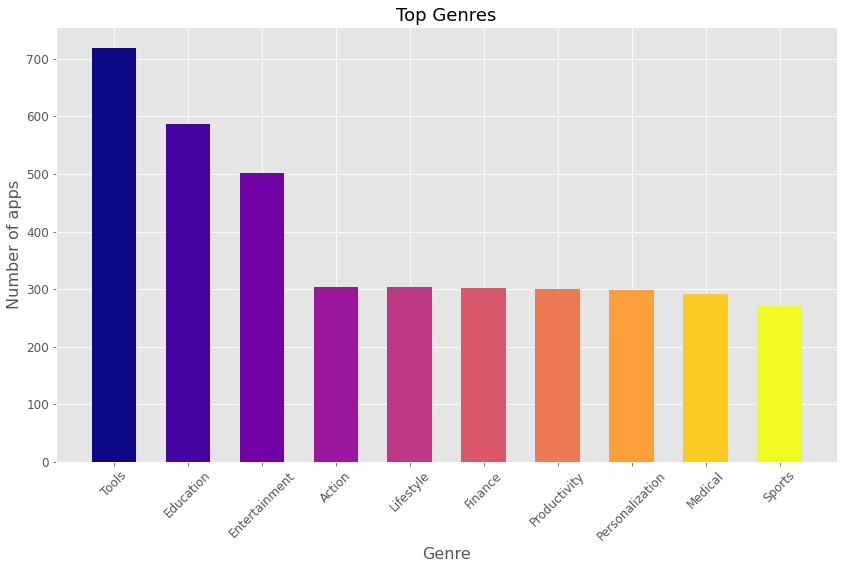

In [403]:
plt.figure(figsize=(14,8))
style.use('ggplot')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.title('Top Genres',fontsize=18)
plt.xlabel('Genre', fontsize=16)
plt.ylabel('Number of apps', fontsize=16)

colors = px.colors.sequential.Plasma

plt.bar(num_genres.index[:10], num_genres.values[:10], color =colors, width=0.6)

plt.show()

In [404]:
## ADVANCED VISUALIZATION

bar = px.bar(x = num_genres.index[:15], # index = category name
             y = num_genres.values[:15], # count
             title='Top Genres',
             hover_name=num_genres.index[:15],
             color=num_genres.values[:15],
             color_continuous_scale='Agsunset')
 
bar.update_layout(xaxis_title='Genre',
yaxis_title='Number of Apps',
coloraxis_showscale=False)
 
bar.show()

In [405]:
df_cleaned.Type.value_counts()

Free    7595
Paid     604
Name: Type, dtype: int64

In [406]:
df_free_vs_paid = df_cleaned.groupby(['Category', 'Type'],as_index=False).agg({'App': pd.Series.count})

In [407]:
df_free_vs_paid

,Category,Type,App
0,ART_AND_DESIGN,Free,58
1,ART_AND_DESIGN,Paid,3
2,AUTO_AND_VEHICLES,Free,72
3,AUTO_AND_VEHICLES,Paid,1
4,BEAUTY,Free,42
...,...,...,...
56,TRAVEL_AND_LOCAL,Paid,8
57,VIDEO_PLAYERS,Free,144
58,VIDEO_PLAYERS,Paid,4
59,WEATHER,Free,65


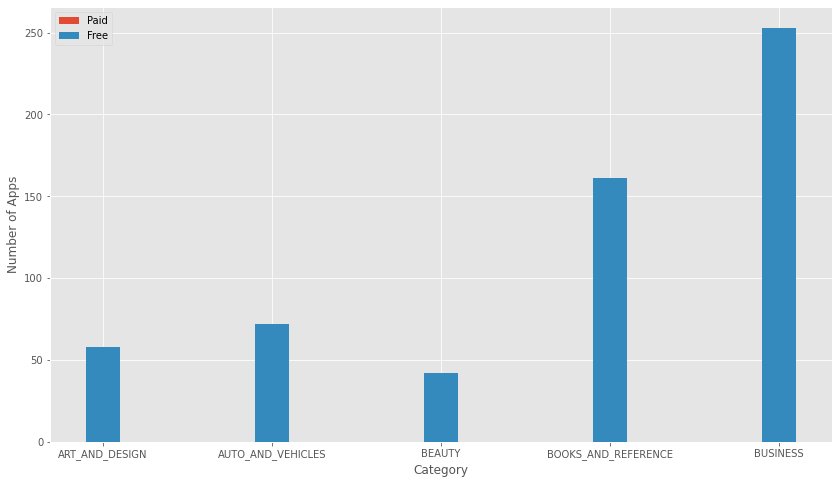

In [408]:
plt.figure(figsize=(14,8))
style.use('ggplot')

plt.xticks()
plt.yticks()

plt.title('')
plt.xlabel('Category')
plt.ylabel('Number of Apps')

plt.bar(df_free_vs_paid.Category.unique()[:5], df_free_vs_paid.App[df_free_vs_paid.Type == 'Paid'][:5], width=0.2, label='Paid')
plt.bar(df_free_vs_paid.Category.unique()[:5], df_free_vs_paid.App[df_free_vs_paid.Type == 'Free'][:5], width=0.2, label='Free')

plt.legend()
plt.show()

In [409]:
## ADVANCED VISUALIZATION
g_bar = px.bar(df_free_vs_paid,
               x='Category',
               y='App',
               title='Free vs Paid Apps by Category',
               color='Type',
               barmode='group')
 
g_bar.update_layout(xaxis_title='Category',
                    yaxis_title='Number of Apps',
                    xaxis={'categoryorder':'total descending'},
                    yaxis=dict(type='log'))
 
g_bar.show()

In [410]:
df_type_installs = df_cleaned[['Type', 'Installs']]
df_type_installs

,Type,Installs
21,Free,1
28,Paid,1
47,Paid,1
82,Free,5
99,Free,5
...,...,...
10824,Free,1000000000
10828,Free,1000000000
10829,Free,1000000000
10831,Free,1000000000


In [411]:
fig = px.box(df_cleaned, x='Type', y='Installs',   title="How Many Downloads are Paid Apps Giving Up?",
            color='Type', notched=True, points='all')

fig.update_layout(yaxis=dict(type='log')) 
fig.show()

In [412]:
df_paid = df_cleaned[df_cleaned['Type'] == 'Paid']

In [419]:
fig = px.box(df_paid, x='Category', y='Revenue_Estimate', title='How Much Can Paid Apps Earn?')

fig.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Ballpark Revenue',
                  xaxis={'categoryorder':'min ascending'},
                  yaxis=dict(type='log')) 
fig.show()

In [ ]:
## What is the median price for a paid app?

In [424]:
fig = px.box(df_paid, x='Category', y='Price', title='Price per Category')

fig.update_layout(xaxis_title='Category',
                  yaxis_title='Paid App Price',
                  xaxis={'categoryorder':'max descending'},
                  yaxis=dict(type='log')) 
fig.show()